<a href="https://colab.research.google.com/github/Gilbomfim/Phython_Projects/blob/main/Qualitativedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEXT DATA - EXPLORATORY ANALYSIS**

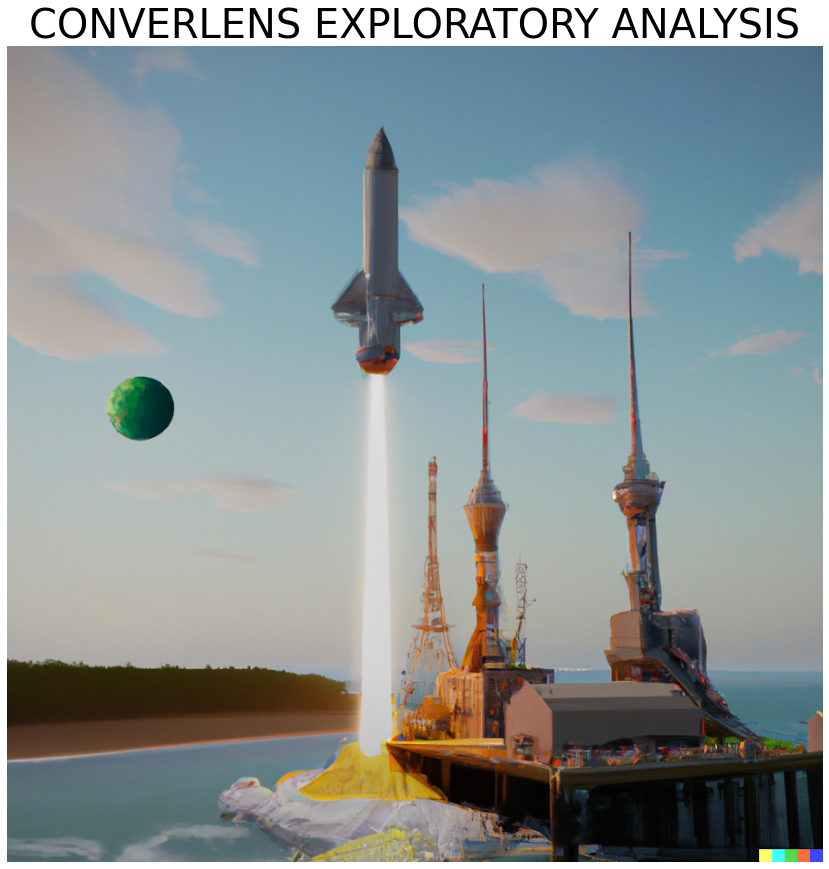

In [ ]:
#@title 
import matplotlib.pyplot as plt
from io import BytesIO
import requests

url = 'https://lh3.googleusercontent.com/G2Moy4HLzeqTzBZW2VcJ9lrAw05vIm-FTlJBGpXfUBNN5gWJSoc0b7DPQroduudAFd4qLEL-yEn7oxrAh6-rQJBkibc4Nnx-FHDCe-nDBklVgJKAG-zTlYKZxBuGsczQhiZEhUd4T3LXDmXgC-zexzg0BHzvRTPRInmmfE_xnHErBlUj_bwvzcdFp0bry0w7r-7xIpKDndacjVLzZcBDIqPHNBAoBeP78qX4ANv21hBYhc6zQLMiHT1s3ABpFoRihgf2zLWTp3QbnelMPFXhH820jfWNhrk5q2DiZNHBc37bJKQtlgoC81bjdTrcxes_uVfcL39rTcf-ghJPYRzgMeX7VnQclzEAbKLBgM2qAB_NI_EMlUG8Ctx8qcX0-Z-EsR5yatkzipvMvkcvUQhUvW8K6wkOQdRPJ7reSMupP3B4vXimJaUjjQ4Ury9fzPq9gxlMDpVBnMKWcwcGMqUqVceLeUopLdZNYNBmPVoTJsvYqtalYpnYetRTQ2kNHi1nRBR7tYWb0dfZ8z2vWRp7hnLi-7fYJ-PUrJhwWlX3P7MvpYJzXOwkBuI_lyFqcjw-ak6hY9WicZM6yUTo4GI2_O6Ie_LEEvtyazZqg5SZ5mzcdmiRaVKRDZn_msE33DujK1J1GyLRnM7Go8kj8g3qyXWRFo3DGg2RP6ogNY8_R7oB1CjVWbTjGoRmjO0LT5iTr3lTej8TnfTnTD1rF7Yo-oj5Xn7wxQRyjmCvl52ZNe1ciMlJWSPje8JH9Ia4BZ8A-cGNN2hLlxIbF97Td65SIEd3-NI9JJjtx9ZtWogkmFC8vqphDK2ekj3NoC4lU9j2RVcD1LuFbmmCLYGxeQ1oKOGVrbpz59k13fonx6IStErjtGvem3HqJSJ3bfriYgZvnkURZjGmRigKJDny8HvRTZsc9tJ7dcfAse3lbwSp_IXCztaeB7EELO8j8DVktw0di2yhL5fHm_KdbwDahZQ=s893-no?authuser=0'
s = requests.get(url).content
img = plt.imread(BytesIO(s), format='png')

fig = plt.figure(figsize=(20, 15)) # set the figure size to 10x10 inches
plt.imshow(img)
plt.axis('off') # remove the x- and y-axis labels
plt.title('CONVERLENS EXPLORATORY ANALYSIS', fontsize=40) # set the title font size to 20
plt.show()

# **Table of contents:**

1.Introduction

2.Data pre-processing and cleaning

3.Data exploration 

4.Topic Models Visualization

5.Conclusion

6.Reference


# **1.Introduction**

This project aims to analyze a text dataset using advanced data visualization techniques to uncover insights and patterns in the data. The data will be pre-processed, cleaned and validated for accuracy. The visualization techniques used will be cutting-edge and include clustering models to group similar data points. The end goal is to gain a deeper understanding of the data and derive actionable insights through innovative visualization methods.

**1.1 Install and Importing librarie.**

In [ ]:

!pip install -q pandas numpy nltk matplotlib seaborn sklearn  spacy textblob wordcloud scikit-learn gensim  squarify



In [ ]:
pip -q install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
pip install -q dash dash-cytoscape pyvis 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00


In [ ]:
pip install -q jupyter-dash

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn import preprocessing, model_selection
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
import string
import re
import gensim
import networkx as nx
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

**1.2 Loading and checking the dataset.** 

In order to effectively analyze and process our document and data set, it is important to have a clear understanding of the distribution of sizes of submissions. This information gives us a sense of the scale and scope of the data, allowing us to determine the resources needed for processing. Additionally, by identifying any outliers or anomalies in the size distribution, we can make informed decisions about data preprocessing, storage, and analysis strategies, ensuring the efficiency and accuracy of our analysis.

Loading csv file:

In [ ]:
df = pd.read_csv("/content/export_UniSA.csv",index_col=0)

Reinforce that the text data will be string data type, so we can work on it.

In [ ]:
df['Imported document (Transcript if available)'] = df['Imported document (Transcript if available)'].apply(lambda x: str(x))

Now, Let's take a look on the raw dataset:

In [ ]:
#Overview of the dataset
df.head(1)

,Imported document (Transcript if available)
Short ID,
103,Inquiry into Developing Australia's Space Indu...


Get more info and check missing values and duplicates in the raw dataset:

In [ ]:
#Checking data of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 103 to 1
Data columns (total 1 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Imported document (Transcript if available)  103 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
#Checking missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Imported document (Transcript if available)    0
dtype: int64


In [ ]:
#Checking duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


The numbers of words in each submission in the raw dataset on the 'word_count" column:

In [ ]:
# Count of words in each row of the raw dataset
df['word_count'] = df['Imported document (Transcript if available)'].str.split().str.len()
print(df)

                Imported document (Transcript if available)  word_count
Short ID                                                               
103       Inquiry into Developing Australia's Space Indu...        1859
102       Inquiry into Developing Australia's Space Indu...        3525
101       Inquiry into Developing Australia's Space Indu...         636
100       Inquiry into Developing Australia's Space Indu...        2730
99        Inquiry into Developing Australia's Space Indu...        1218
...                                                     ...         ...
5         Inquiry into Developing Australia's Space Indu...        4428
4         Inquiry into Developing Australia's Space Indu...        1979
3         Inquiry into Developing Australia's Space Indu...        2266
2         Inquiry into Developing Australia's Space Indu...        1154
1         Inquiry into Developing Australia's Space Indu...        1394

[103 rows x 2 columns]


** 1.3 Summary Statistcs of the count of words **

In [ ]:
# get the count of words in the "Imported document" column
word_count = df['Imported document (Transcript if available)'].str.split().str.len()

print(word_count.describe())

count      103.000000
mean      3280.757282
std       3741.158525
min        175.000000
25%       1208.000000
50%       2379.000000
75%       3862.000000
max      30264.000000
Name: Imported document (Transcript if available), dtype: float64


Submissions with more than 10000 words in the raw dataset:

In [ ]:
#count of words for submissions > 10000
df_filtered = df.loc[df['word_count'] > 10000]
print(df_filtered)

                Imported document (Transcript if available)  word_count
Short ID                                                               
96        Inquiry into Developing Australia's Space Indu...       30264
51        Inquiry into Developing Australia's Space Indu...       18690


Total count of words in the raw dataset:

In [ ]:
#total count of words
total_words = df['word_count'].sum()
print("Total words in the raw dataset","=",total_words)

Total words in the raw dataset = 337918


Distribution of the size of submission(count words) :

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


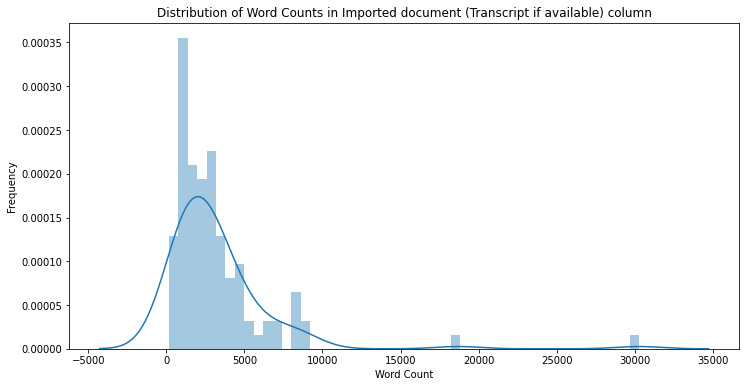

In [ ]:
# Calculate word counts for each row in the column
word_counts = df["Imported document (Transcript if available)"].str.split().str.len()
plt.figure(figsize=(12,6))
# Create histogram
sns.distplot(word_counts, bins=50)
# Add labels and title
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in Imported document (Transcript if available) column")

# Show plot
plt.show()

**Comments:**

-The average number of words in the submissions is 3280.

-The largest submission has 30,264 words and the smallest has 175 words, this indicates that there is a big difference in the number of words between the largest and the smallest submission.

-The mean being greater than the median suggests that the distribution of the size of submissions is right-skewed. This implies that the majority of the submissions have less words than the average and a few submissions have a larger number of words than the average.

-Only two submissions have a count of words greater than 10,000, further supporting the conclusion that the distribution is right-skewed with a few outliers.


# **2.Data pre-processing and cleaning**

To further improve your exploratory analysis, you can consider removing any unnecessary elements such as commas, titles, and other non-essential information from your dataset. This can help to streamline your data and make it easier to work with. You can use data preprocessing techniques like text cleaning,lemmatization to remove such elements. This will help to ensure that your dataset is as clean and straightforward as possible, which will make it easier for you to perform your analysis and extract meaningful insights.

Let's see how our data looks like and understand what we should remove in ou  cleaning process or not:

In [ ]:
row = df.iloc[0]['Imported document (Transcript if available)']
print(row)

Inquiry into Developing Australia's Space Industry
   Submission 80 - Supplementary Submission
                        Inquiry into Developing Australia's Space Industry
                           Submission 80 - Supplementary Submission




       Boeing response to Questions on Notice from Brisbane Hearing, 7 May 2021.


Proposed Ministerial Council for Space Science, Engineering, Innovation and
Manufacturing
A key priority is to harmonise and co-ordinate Australia’s defence, commercial and civil space
strategies as one. Aligning Australia’s cross-domain space requirements will enable industry to
better understand and target future investments in Australia. Currently, multiple activities are
occurring in many areas of government and the private sector requiring a strategic roadmap to
optimize Australia’s ambitions and potential for a Space industry.
Government may consider establishing a Ministerial Council to oversee the further development
of the Australian Space Industry. Such a 


**2.1 Cleaning and pre-processing actions:**

-Remove any unwanted characters or symbols. 

-Convert all text to lowercase. 

-Tokenize the text into individual words. 

-Remove stopwords. 

-Perform lemmatization.

-Remove numbers.

-Remove especific carachthere, especific sentences and titles. 

-Remove whitespaces.




In [ ]:
# Apply the cleaning and preprocessing steps to the column "Imported document (Transcript if available)"

 

def clean_text(text):
   # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # set up stop_words
    stop_words = set(stopwords.words("english"))
    # Remove stop words
    text = " ".join(x for x in nltk.word_tokenize(text) if x not in stop_words)
    # Lemmatize
    # set up lemmatizer
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(token) for token in text.split()])
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove "-"
    text = re.sub(r'-', '', text)
    # Remove "%"
    text = re.sub(r'%', '', text)
    # Remove "&nbsp"(digits - 0:9)
    text = re.sub(r'&nbsp', '', text)
    # Remove "inquiry developing australia space industry", "submission supplementary submission", "submission developing australia space industry", "submission", "supplementary"(title)
    text = re.sub("inquiry developing australia space industry|submission supplementary submission|submission developing australia space industry|submission|supplementary", " ", text)
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove leading/trailing whitespace
    text = text.strip()
    return text

df["Imported document (Transcript if available)"] = df["Imported document (Transcript if available)"].apply(clean_text)




Let's sse how look the clean dataset:

In [ ]:
df.head()

,Imported document (Transcript if available),word_count
Short ID,,
103,boeing response question notice brisbane heari...,1859
102,house representative standing committee indust...,3525
101,committee secretary standing committee industr...,636
100,disruptive innovation australia space industry...,2730
99,response question notice submitted house repre...,1218


# **3.Exploratory Analysis**

**3.1 Summary statistics of the count of words in each submission ,after preprocessing and cleaning process.**

In [ ]:
# get the count of words in the "clean_submission" 
word_count = df['Imported document (Transcript if available)'].str.split().str.len()

print(word_count.describe())

count      103.000000
mean      1928.407767
std       2252.992182
min         64.000000
25%        707.500000
50%       1376.000000
75%       2245.500000
max      18267.000000
Name: Imported document (Transcript if available), dtype: float64


In [ ]:
#total count of words
df['word_count'] = df['Imported document (Transcript if available)'].str.split().str.len()
total_words = df['word_count'].sum()
print("Total words in the raw dataset","=",total_words)

Total words in the raw dataset = 198626


**Comments:**

-The preprocessing and cleaning of the dataset reduced the count of words by 41.22% from the raw dataset.

-Although the dataset still has a few outliers, the size of the submissions is now concentrated between 707 and 2245.5 words.

-The submissions with more than 10,000 words represent less than 2% of the total submissions.

-To balance the trade-off between excluding outliers and keeping meaningful information, it was decided to keep the information.In the case of the submissions, it is possible that the outliers represent valid but rare observations. These submissions could be particularly long or detailed but could contain important information that should be considered in the analysis. 

**3.2 Basic Exploration**


The goal of the initial approach described is to gain a surface-level understanding of the submissions and categorize them into patterns for further analysis. The purpose of this is to identify common themes in the data, making it easier to understand and interpret. This approach involves using common data visualization techniques to help facilitate the analysis.

The initial step is to have a understanding of the submissions, which can be done through simple visualizations, such as bar charts or word clouds. These visualizations can help reveal the most frequently occurring words or phrases in the submissions, and give an overall picture of the data.

Once a high-level understanding has been achieved, the submissions can then be grouped into categories or patterns based on common themes or similarities. This can be done using more advanced techniques such as clustering models or topic modeling. 

3.2.1 The world cloud visualization method is commonly used to visualize qualitative data.

Let's take a look in the principal words in a random sample of the dataset:

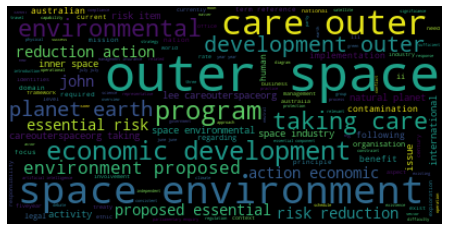

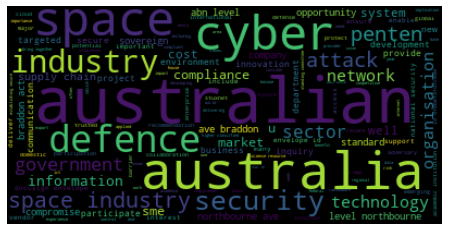

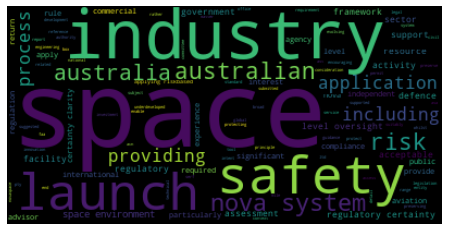

In [ ]:
for i in df.sample(3).index:
    text = df.at[i, "Imported document (Transcript if available)"]
    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


**3.2.2  A bar chart with the frequency of the top 30 words :**

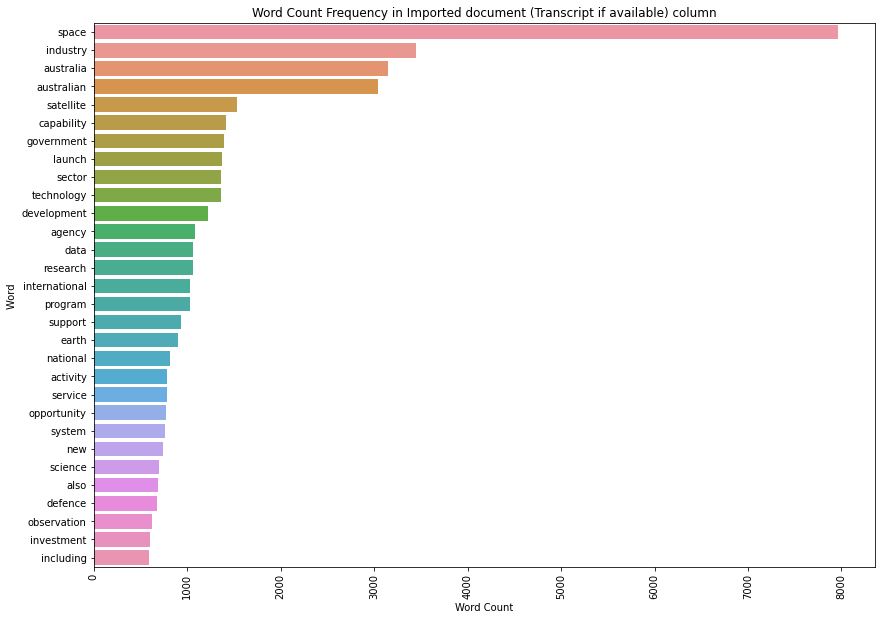

In [ ]:
words = nltk.word_tokenize(df["Imported document (Transcript if available)"].str.cat(sep=' '))

# Calculate frequency of each word
word_freq = nltk.FreqDist(words)
df_word_count = pd.DataFrame({"word": list(word_freq.keys()),"count": list(word_freq.values())})
df_word_count = df_word_count.sort_values(by=["count"], ascending=False).head(30)
plt.figure(figsize=(14,10))
sns.barplot(y=df_word_count['word'], x=df_word_count['count'])
plt.xlabel("Word Count")
plt.xticks(rotation=90)
plt.ylabel("Word ")
plt.title("Word Count Frequency in Imported document (Transcript if available) column")
plt.show()

We aim to have a deeper understanding of the top 30 words by removing some of them to better focus on the remaining words. By doing so, we can gain more insights into the meaning and context of the data.

Let's look at the covered words:

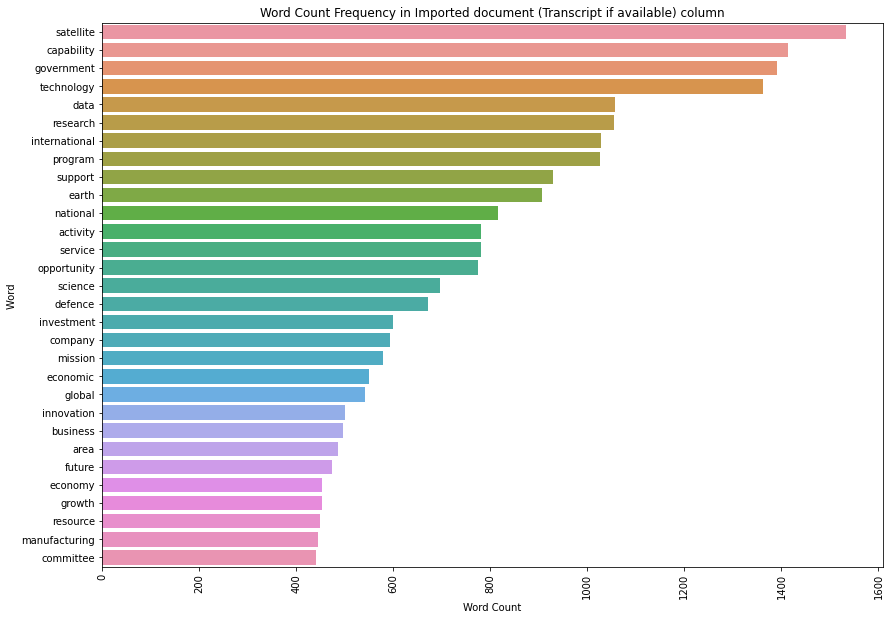

In [ ]:
# List of words to remove
stop_words = ["space", "industry","australia","australian","launch","sector","development","agency","new","also","including","observation","system","would","provide","need","benefit"]

# Tokenize the text and remove stop words
words = [word for word in nltk.word_tokenize(df["Imported document (Transcript if available)"].str.cat(sep=' ')) if word.lower() not in stop_words]

# Calculate frequency of each word
word_freq = nltk.FreqDist(words)
df_word_count = pd.DataFrame({"word": list(word_freq.keys()),"count": list(word_freq.values())})
df_word_count = df_word_count.sort_values(by=["count"], ascending=False).head(30)
plt.figure(figsize=(14,10))
sns.barplot(y=df_word_count['word'], x=df_word_count['count'])
plt.xlabel("Word Count")
plt.xticks(rotation=90)
plt.ylabel("Word ")
plt.title("Word Count Frequency in Imported document (Transcript if available) column")
plt.show()

**3.2.3 In order to provide a new way to visualize the top frequency words, we have adopted an interactive rectangular treemap visualization technique using the plotly.express module. This approach allows us to measure and visualize the frequency of words through the size of the rectangles, while also including the word and count of the word as labels.**

**-Rectangular Interactive Treemap.**

Let's take a look on the top 23 words in the Treemap represented by distinct colors for each word: 

In [ ]:
import plotly.express as px

# Tokenize the text
words = nltk.word_tokenize(df["Imported document (Transcript if available)"].str.cat(sep=' '))

# Calculate frequency of each word
word_freq = nltk.FreqDist(words)
df_word_count = pd.DataFrame({"word": list(word_freq.keys()),"count": list(word_freq.values())})
df_word_count = df_word_count.sort_values(by=["count"], ascending=False).head(23)

#Plot the treemap

fig = px.treemap(df_word_count, path=["word"], values="count", title='Word Count Frequency in Imported document (Transcript if available) column')
fig.update_traces(textfont=dict(size=14))
fig.update_layout(title_font=dict(size=16))
fig.update_layout(width=1300, height=800)

# Display the word count as label
fig.data[0].textinfo = 'label+text+value'

fig.show()

-We aim to have a deeper understanding of the top 23 words by removing some of them to better focus on the remaining words. 

-This Treemap provide the color scale based on the count of each word, with higher count words being assigned a ligther(yellow) color, and lower count words being assigned a darker(purple) color

Let's look at the Treemap covered words:

In [ ]:
import plotly.express as px

# List of words to remove
stop_words = ["space", "industry","australia","australian","launch","sector","development","agency","new","also","including","observation","system","would","provide","need","benefit"]

# Tokenize the text
words = [word for word in nltk.word_tokenize(df["Imported document (Transcript if available)"].str.cat(sep=' ')) if word.lower() not in stop_words]

# Calculate frequency of each word
word_freq = nltk.FreqDist(words)
df_word_count = pd.DataFrame({"word": list(word_freq.keys()),"count": list(word_freq.values())})
df_word_count = df_word_count.sort_values(by=["count"], ascending=False).head(23)

# Plot the treemap

fig = px.treemap(df_word_count, path=["word"], values="count", title='Word Count Frequency in Imported document (Transcript if available) column',
                 color="count", color_continuous_scale='Plasma', branchvalues='total')
fig.update_traces(textfont=dict(size=14))
fig.update_layout(title_font=dict(size=16))
fig.update_layout(width=1300, height=800)
# Display the word count as label
fig.data[0].textinfo = 'label+text+value'

fig.show()

**Comments:**

-The main topics in the submissions are related to the space industry in Australia, such as space, industry, australia, satelite, capability, technology, development, agency, internacional, earth, etc. These words suggest that the submissions contain information about various projects and factors that are important for the development of the space industry in Australia.

-The initial data exploration revealed main topics in submissions, but to gain deeper understanding and uncover new insights, known topics were excluded from the analysis.Exclusion of known topics can lead to loss of important information, therefore it was done carefully and only for this charts analysis above to get a better understanding of the other words present in the submissions.



 **3.3 Exploration - Topic Modelings - LDA (Latent Dirichlet Allocation)**

LDA works by assuming that each document is generated by a mixture of latent topics, where each topic is represented by a distribution of words. The algorithm then uses this assumption to estimate the topics present in the corpus and the word probabilities associated with each topic. The results of an LDA model are a set of topics, each represented by a list of the most probable words, which can be used to gain insights into the main themes present in the corpus of text data.

By applying LDA to our qualitative data, we can uncover the underlying themes and topics present in the data, which can help us gain deeper insights and understanding of the information contained in the data. The results of the LDA model can be used to categorize documents, identify key themes, and gain a better understanding of the relationships between different topics.

In [ ]:
df.head()

,Imported document (Transcript if available),word_count
Short ID,,
103,boeing response question notice brisbane heari...,1071
102,house representative standing committee indust...,1880
101,committee secretary standing committee industr...,317
100,disruptive innovation australia space industry...,1510
99,response question notice submitted house repre...,686


Let's build our topic model:

In [ ]:
# Get the text data from the "Imported document" column
data = df["Imported document (Transcript if available)"].tolist()

# Clean and preprocess the data
data_ready = [doc.lower().split() for doc in data]

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Print topics
topics = lda_model.print_topics(num_words=5)

topics

[(0,
  '0.078*"outer" + 0.038*"law" + 0.026*"environment" + 0.023*"legal" + 0.019*"risk"'),
 (1,
  '0.013*"hap" + 0.009*"vocus" + 0.009*"milestone" + 0.006*"systematic" + 0.006*"measurable"'),
 (2,
  '0.078*"launch" + 0.024*"space" + 0.017*"australian" + 0.016*"virgin" + 0.016*"orbit"'),
 (3,
  '0.012*"dmtc" + 0.011*"penten" + 0.006*"envelope" + 0.006*"ei" + 0.006*"compromise"'),
 (4,
  '0.043*"vssec" + 0.033*"student" + 0.028*"education" + 0.023*"science" + 0.022*"centre"'),
 (5,
  '0.021*"data" + 0.019*"satellite" + 0.019*"earth" + 0.014*"program" + 0.011*"observation"'),
 (6,
  '0.040*"committee" + 0.024*"science" + 0.024*"resource" + 0.021*"standing" + 0.016*"house"'),
 (7,
  '0.069*"space" + 0.039*"industry" + 0.025*"australian" + 0.023*"australia" + 0.015*"government"'),
 (8,
  '0.018*"medical" + 0.011*"astrobiology" + 0.008*"drop" + 0.007*"steam" + 0.007*"adversary"'),
 (9,
  '0.065*"solar" + 0.043*"power" + 0.023*"energy" + 0.022*"spacex" + 0.017*"ansto"'),
 (10,
  '0.009*"brit

**3.4 Checking Coherence Score and Perplexity of the topic model.**

**Coherence Score:**

A measure of the quality of a topic model. The coherence score measures the degree of semantic similarity between the words in a topic.

Higher values indicate better topic models.

**Perplexity:**

A measure of how well a probability model predicts a sample.
In the case of topic modeling, it measures how well a topic model predicts the words in a given document.

Lower values indicate better topic models.


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.489473364643254

Coherence Score:  0.4716865850902634


**3.5 Evaluating the quality of topic models and find the best-performing topic model.**

One common way to evaluate the performance of a topic model is by comparing its coherence score and perplexity score with other models having a different number of topics. 

In [ ]:
def compare_models(data_ready, id2word, corpus, num_topics_list):
    coherence_scores = []
    perplexity_scores = []
    
    for num_topics in num_topics_list:
        # Build LDA model with different number of topics
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
        
        # Calculate perplexity score
        perplexity_scores.append(lda_model.log_perplexity(corpus))
        
        # Calculate coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    
    return coherence_scores, perplexity_scores

# List of number of topics to compare
num_topics_list = [7, 10, 14, 20, 25]

# Compare models with different number of topics
coherence_scores, perplexity_scores = compare_models(data_ready, id2word, corpus, num_topics_list)

# Print results
for i in range(len(num_topics_list)):
    print("Number of topics:", num_topics_list[i])
    print("Coherence score:", coherence_scores[i])
    print("Perplexity score:", perplexity_scores[i])
    print("\n")

Number of topics: 7
Coherence score: 0.4183107578651775
Perplexity score: -7.490623223989605


Number of topics: 10
Coherence score: 0.42683424308378415
Perplexity score: -7.475602574237683


Number of topics: 14
Coherence score: 0.4716865850902634
Perplexity score: -7.489473364643254


Number of topics: 20
Coherence score: 0.4686922812536759
Perplexity score: -7.48304110556058


Number of topics: 25
Coherence score: 0.48605837178218303
Perplexity score: -7.490881586116121




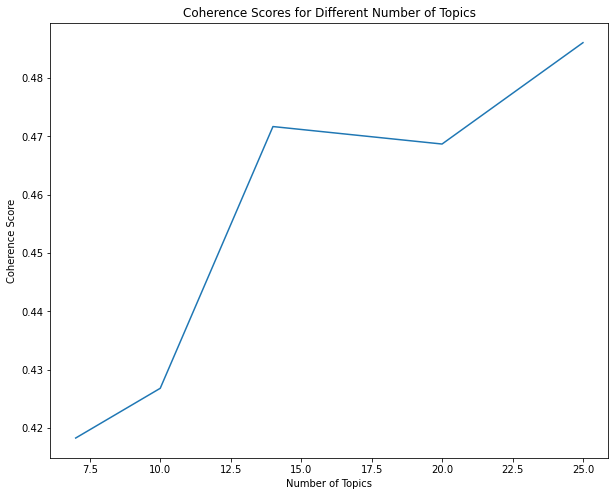

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(num_topics_list, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics")

plt.show()


**Comments:**

-The compare_models function compares LDA models with different number of topics using preprocessed text data, the dictionary mapping of words to IDs, and the corpus representation of the text data.

-It calculates and return coherence score and perplexity score for each model.

-After evaluating the results, the 14-topic model is preferred for our analysis as it provides a good balance of high coherence score (close to the highest score) and low perplexity score, offering both interpretability and computational efficiency.

# **4.Topic Model Visualization**

**4.1 pLDAvis Visualization**

In [ ]:
# Import the visualization library
import pyLDAvis
import pyLDAvis.gensim_models

# Create doc_term_matrix
doc_term_matrix = [id2word.doc2bow(doc) for doc in data_ready]

# Enable the notebook mode
pyLDAvis.enable_notebook()

# Create the visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, id2word)

# Display the visualization
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.341427 -0.040346       1        1  37.077111
12    -0.302580 -0.018260       2        1  24.622701
5     -0.228475 -0.115030       3        1  20.772282
2     -0.127945 -0.028263       4        1   5.754947
6     -0.048778  0.223900       5        1   3.337639
13     0.065572 -0.142960       6        1   2.541955
4     -0.019242  0.279626       7        1   1.455397
0      0.115501 -0.019871       8        1   1.002773
9      0.110188 -0.005764       9        1   0.939821
8      0.167358 -0.022649      10        1   0.863765
11     0.145658 -0.030338      11        1   0.539941
10     0.156632 -0.025888      12        1   0.427528
1      0.155050 -0.027041      13        1   0.374437
3      0.152489 -0.027115      14        1   0.289704, topic_info=                             Term         Freq        Total Category  logprob  \
290                        launch  1180.000000  1180.000000  Default  30.0000   
492                         space  7974.000000  7974.000000  Default  29.0000   
462                       science   696.000000   696.000000  Default  28.0000   
712                          data   953.000000   953.000000  Default  27.0000   
740                         earth   875.000000   875.000000  Default  26.0000   
...                           ...          ...          ...      ...      ...   
10040                        bell     1.187641     1.975947  Topic14  -6.1831   
10136  infopentencomiwwwpentencom     1.187641     1.975947  Topic14  -6.1831   
10159                  ransomware     1.187641     1.975947  Topic14  -6.1831   
10165                  solarwinds     1.187641     1.975947  Topic14  -6.1831   
9783                   biogenesis     1.187641     1.975947  Topic14  -6.1831   

       loglift  
290     30.000  
492     29.000  
462     28.000  
712     27.000  
740     26.000  
...        ...  
10040    5.335  
10136    5.335  
10159    5.335  
10165    5.335  
9783     5.335  

[750 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
9096      8  0.876683       _
5036      5  0.967136     abn
3         1  0.380182  access
3         2  0.156825  access
3         3  0.460971  access
...     ...       ...     ...
583       1  0.206372    year
583       2  0.431720    year
583       3  0.329721    year
583       7  0.033209    year
585       2  0.984596     yet

[1140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 13, 6, 3, 7, 14, 5, 1, 10, 9, 12, 11, 2, 4])

**Comments:**

-Each bubble on a topic model plot represents a topic.

-The size of the bubble indicates the prevalence of that topic.

-A good topic model will have big, non-overlapping bubbles spread throughout the chart, instead of being clustered in one area.

-A model with too many topics will have many overlaps and small bubbles   clustered in one region of the chart.

-By hovering over a bubble, the corresponding keywords for the selected topic are displayed.

**4.2 Sunburst Visualization**

4.2.1 

-Input the number of topics you want to visualize.

-The selected model has 14 topics, so you can choose from options 0 to 13.

In [ ]:
def plot_topics_visualization(lda_model, num_topics_to_show):
    topics = lda_model.show_topics(num_topics=num_topics_to_show, num_words=4, formatted=False)
    data = []
    for topic_id in range(num_topics_to_show):
        topic = topics[topic_id]
        words = [word[0] for word in topic[1]]
        frequencies = [word[1] for word in topic[1]]
        for i in range(len(words)):
            data.append({'topic': topic_id, 'word': words[i], 'frequency': frequencies[i]})
    df = pd.DataFrame(data)
    fig = px.sunburst(df, path=['topic', 'word'], values='frequency')
    fig.update_layout(width=900, height=900)
    fig.show()

num_topics_to_show = int(input("Enter the number of topics to show 0 to 13: "))
plot_topics_visualization(lda_model, num_topics_to_show)

Enter the number of topics to show 0 to 13: 13


4.2.2

-Select the number of words to visualize from each topic

-Choose the specific topic to visualize

In [ ]:

def plot_topic_visualization(lda_model, num_words, topic_id_to_show):
    topics = lda_model.show_topics(num_topics=14, num_words=num_words, formatted=False)
    data = []
    topic = topics[topic_id_to_show]
    words = [word[0] for word in topic[1]]
    frequencies = [word[1] for word in topic[1]]
    for i in range(len(words)):
        data.append({'topic': topic_id_to_show, 'word': words[i], 'frequency': frequencies[i]})
    df = pd.DataFrame(data)
    fig = px.sunburst(df, path=['topic', 'word'], values='frequency')
    fig.update_layout(width=900, height=900)
    fig.show()

num_words = int(input("Enter the number of words to show for each topic: "))
topic_id_to_show = int(input("Enter the topic id to show (0 to 13): "))
plot_topic_visualization(lda_model, num_words, topic_id_to_show)

Enter the number of words to show for each topic: 8
Enter the topic id to show (0 to 13): 5


**4.3 Neural Network Visualization**

In [ ]:
def visualize_network(topics, num_topics, layout='spring'):
    G = nx.Graph()
    for topic_id, topic in enumerate(topics[:num_topics]):
        topic_words = topic[1].split(" + ")
        topic_words = [(word.split("*")[1], float(word.split("*")[0])) for word in topic_words]
        for word, weight in topic_words:
            if word not in G.nodes:
                G.add_node(word)
            G.add_edge(topic_id, word, weight=weight)

    if layout == 'spring':
        pos = nx.spring_layout(G)
    elif layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'fruchterman_reingold':
        pos = nx.fruchterman_reingold_layout(G)
    else:
        pos = nx.spring_layout(G)

    plt.figure(figsize=(25, 15))
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.show()

-Input the number of topics you want to visualize.

-Input the layout you prefer among the options: 'spring', 'circular', 'fruchterman_reingold'.

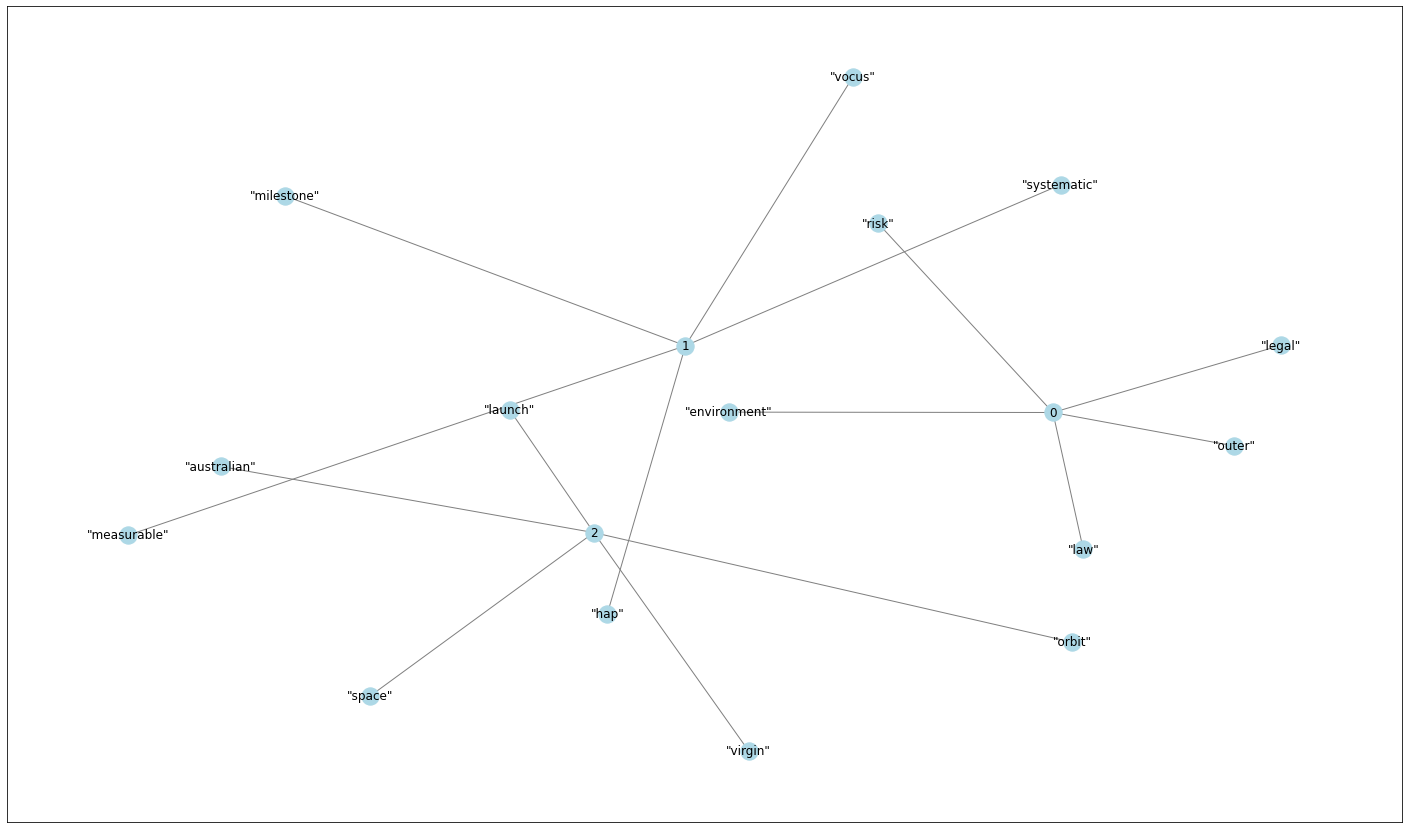

In [ ]:
visualize_network(topics, num_topics=3, layout='spring')

# **5. Conclusion**

The aim of this project was to discover innovative ways to visualize qualitative data contained in 103 distinct submissions. Upon investigation, the submissions were found to mainly pertain to the development of the space industry across several sectors. The first step was to conduct a basic exploration using word clouds and bar charts to identify the most frequently used words and topics. This revealed the superficial content of the submissions. Based on these findings, the team proposed an interactive rectangular treemap as a new method for visualizing the top frequency words.

Subsequently, the team utilized Latent Dirichlet Allocation (LDA) to uncover the underlying themes and topics in the submissions. The LDA model was built to achieve the best performance and extract 14 relevant topics from the data. These topics were then used to provide a deeper understanding of the main themes present in the data.

Finally, the team presented the topic visualization using pyLDAviz and innovative types of charts such as Sunburst and Neural Network diagrams. These visuals effectively and efficiently convey the key information and insights gleaned from the submissions.

# **6.References**


A Complete Exploratory Data Analysis and Visualization for Text Data.Towards Data Science. Retrieved from https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a.


Topic modeling visualization – How to present the results of LDA models?.Machine Learning Plus. Retrieved from https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/.


Python Sunburst Chart - Converting data frame into Nested List format.Stack Overflow. Retrieved from https://stackoverflow.com/questions/50338778/python-sunburst-chart-converting-data-frame-into-nested-list-format.


Visualizing Networks in Python.Towards Data Science. Retrieved from https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259.



Topic Modeling with Gensim (Python).Machine Learning Plus. Retrieved from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#4whatdoesldado.


Dataset: /content/export_UniSA.csv



